In [66]:
%load_ext autoreload
%autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import support_utils as sup
import data_explore_utils as dex
#import al_plot_utils as alut

from matplotlib import style
sns.set(style="whitegrid")
#sns.set_context("paper")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3,"font.size":19, "axes.labelsize":19,
    "axes.titlesize":19})
#, "xtick.labelsize","ytick.labelsize", "legend.fontsize"
sns.set_color_codes()

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.svm import LinearSVC
##from sklearn.gaussian_process import GaussianProcessClassifier
import xgboost as xgb
#from sklearn.metrics import classification_report, f1_score, make_scorer
#from sklearn.model_selection import cross_validate, StratifiedShuffleSplit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',100)

In [68]:
saving = False

### Read in Candsets

In [69]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../candsets/kitchen/'
pattern_of_filename = 'candset_feature_(.{3,5}_.{2,4})'
sep = ','
# ***********************************************

candsets = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [70]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../candsets/kitchen/'
pattern_of_filename = 'candset_feature_(.{3,5}_.{2,4})_train'
sep = ','
# ***********************************************

candsets_train = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [71]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../candsets/kitchen/'
pattern_of_filename = 'candset_feature_(.{3,5}_.{2,4})_test'
sep = ','
# ***********************************************

candsets_test = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [72]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../datasets/kitchen/'
pattern_of_filename = '(.{2,5})'
sep = ','
# ***********************************************

datasets = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [73]:
datasets.keys()

dict_keys(['katom', 'rewo', 'cdi'])

##### Feature

In [74]:
all_feature = ['finish_lev_sim', 'finish_jac_q3_sim',
       'finish_jac_an_sim', 'finish_rel_jac_an_sim', 'finish_containment_sim',
       'finish_exact_sim', 'shape_lev_sim', 'shape_jac_q3_sim',
       'shape_jac_an_sim', 'shape_rel_jac_an_sim', 'shape_containment_sim',
       'shape_exact_sim', 'color_lev_sim', 'color_jac_q3_sim',
       'color_jac_an_sim', 'color_rel_jac_an_sim', 'color_containment_sim',
       'color_exact_sim', 'base_lev_sim', 'base_jac_q3_sim', 'base_jac_an_sim',
       'base_rel_jac_an_sim', 'base_containment_sim', 'base_exact_sim',
       'style_cosine_tfidf_sim', 'style_lev_sim', 'style_jac_q3_sim',
       'style_jac_an_sim', 'style_rel_jac_an_sim', 'style_containment_sim',
       'style_exact_sim', 'height_lev_sim', 'height_jac_q3_sim',
       'height_jac_an_sim', 'height_rel_jac_an_sim', 'height_containment_sim',
       'height_exact_sim', 'category_lev_sim', 'category_jac_q3_sim',
       'category_jac_an_sim', 'category_rel_jac_an_sim',
       'category_containment_sim', 'category_exact_sim',
       'title_cosine_tfidf_sim', 'title_lev_sim', 'title_jac_q3_sim',
       'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_containment_sim',
       'title_exact_sim', 'capacity_lev_sim', 'capacity_jac_q3_sim',
       'capacity_jac_an_sim', 'capacity_rel_jac_an_sim',
       'capacity_containment_sim', 'capacity_exact_sim', 'material_lev_sim',
       'material_jac_q3_sim', 'material_jac_an_sim', 'material_rel_jac_an_sim',
       'material_containment_sim', 'material_exact_sim', 'brand_lev_sim',
       'brand_jac_q3_sim', 'brand_jac_an_sim', 'brand_rel_jac_an_sim',
       'brand_containment_sim', 'brand_exact_sim', 'product_type_lev_sim',
       'product_type_jac_q3_sim', 'product_type_jac_an_sim',
       'product_type_rel_jac_an_sim', 'product_type_containment_sim',
       'product_type_exact_sim']

In [75]:
len(all_feature) == len(candsets['katom_cdi'].columns.drop(['ids','label']))

True

In [76]:
# dense features for all combinations

# features excluded where the attribute has a very low density (<3%) for at 
# least one dataset that is involved either as source or target in the TL setting
rc_cdi_katom_rewo = ['finish_lev_sim', 'finish_jac_q3_sim',
       'finish_jac_an_sim', 'finish_rel_jac_an_sim', 'finish_containment_sim',
       'finish_exact_sim', 'color_lev_sim', 'color_jac_q3_sim',
       'color_jac_an_sim', 'color_rel_jac_an_sim', 'color_containment_sim',
       'color_exact_sim', 'base_lev_sim', 'base_jac_q3_sim', 'base_jac_an_sim',
       'base_rel_jac_an_sim', 'base_containment_sim', 'base_exact_sim',
       'style_cosine_tfidf_sim', 'style_lev_sim', 'style_jac_q3_sim',
       'style_jac_an_sim', 'style_rel_jac_an_sim', 'style_containment_sim',
       'style_exact_sim', 'height_lev_sim', 'height_jac_q3_sim',
       'height_jac_an_sim', 'height_rel_jac_an_sim', 'height_containment_sim',
       'height_exact_sim', 'title_cosine_tfidf_sim', 'title_lev_sim', 'title_jac_q3_sim',
       'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_containment_sim',
       'title_exact_sim', 'capacity_lev_sim', 'capacity_jac_q3_sim',
       'capacity_jac_an_sim', 'capacity_rel_jac_an_sim',
       'capacity_containment_sim', 'capacity_exact_sim', 'material_lev_sim',
       'material_jac_q3_sim', 'material_jac_an_sim', 'material_rel_jac_an_sim',
       'material_containment_sim', 'material_exact_sim', 'brand_lev_sim',
       'brand_jac_q3_sim', 'brand_jac_an_sim', 'brand_rel_jac_an_sim',
       'brand_containment_sim', 'brand_exact_sim', 'product_type_lev_sim',
       'product_type_jac_q3_sim', 'product_type_jac_an_sim',
       'product_type_rel_jac_an_sim', 'product_type_containment_sim',
       'product_type_exact_sim']

# assign the different feature sets (different dense features depending on combination)
dense_features_dict = {'cdi_katom_rewo':rc_cdi_katom_rewo}

In [77]:
datatype_dict = sup.importJSONFileInDict('./input/kitchen_type_per_column.json')

In [78]:
datatype_dict

{'base': 'str',
 'brand': 'str',
 'capacity': 'str',
 'category': 'str',
 'color': 'str',
 'finish': 'str',
 'height': 'str',
 'material': 'str',
 'product_type': 'str',
 'shape': 'str',
 'style': 'long_str',
 'title': 'long_str'}

### Data-source level

In [79]:
print('Size of all Data Sources')
for df in datasets:
    print(df+': '+str(datasets[df].shape[0]))

Size of all Data Sources
katom: 25635
rewo: 82385
cdi: 7677


In [80]:
dfs_d_vp = {}
for df in datasets:
    ser = pd.Series(1-datasets[df].replace(-1,np.nan).isnull().sum()/len(datasets[df]))
    ser.index = ['_'.join(x.split('_')[1:]) for x in ser.index]
    ser.drop(index=['id','cluster_id','blocking_key','description'],inplace=True)
    ser2 = pd.Series(1-datasets[df].replace(-1,np.nan).nunique()/len(datasets[df]))
    ser2.index = ['_'.join(x.split('_')[1:]) for x in ser2.index]
    ser2.drop(index=['id','cluster_id','blocking_key','description'],inplace=True)
    df1 = pd.DataFrame(ser,columns=['Density'])
    df2 = pd.DataFrame(ser2,columns=['Value Overlap'])
    temp = pd.merge(df1,df2,left_index=True,right_index=True)
    temp['attr'] = temp.index
    dfs_d_vp.update({df:pd.melt(temp, id_vars='attr', var_name="dimension", value_name="values")})

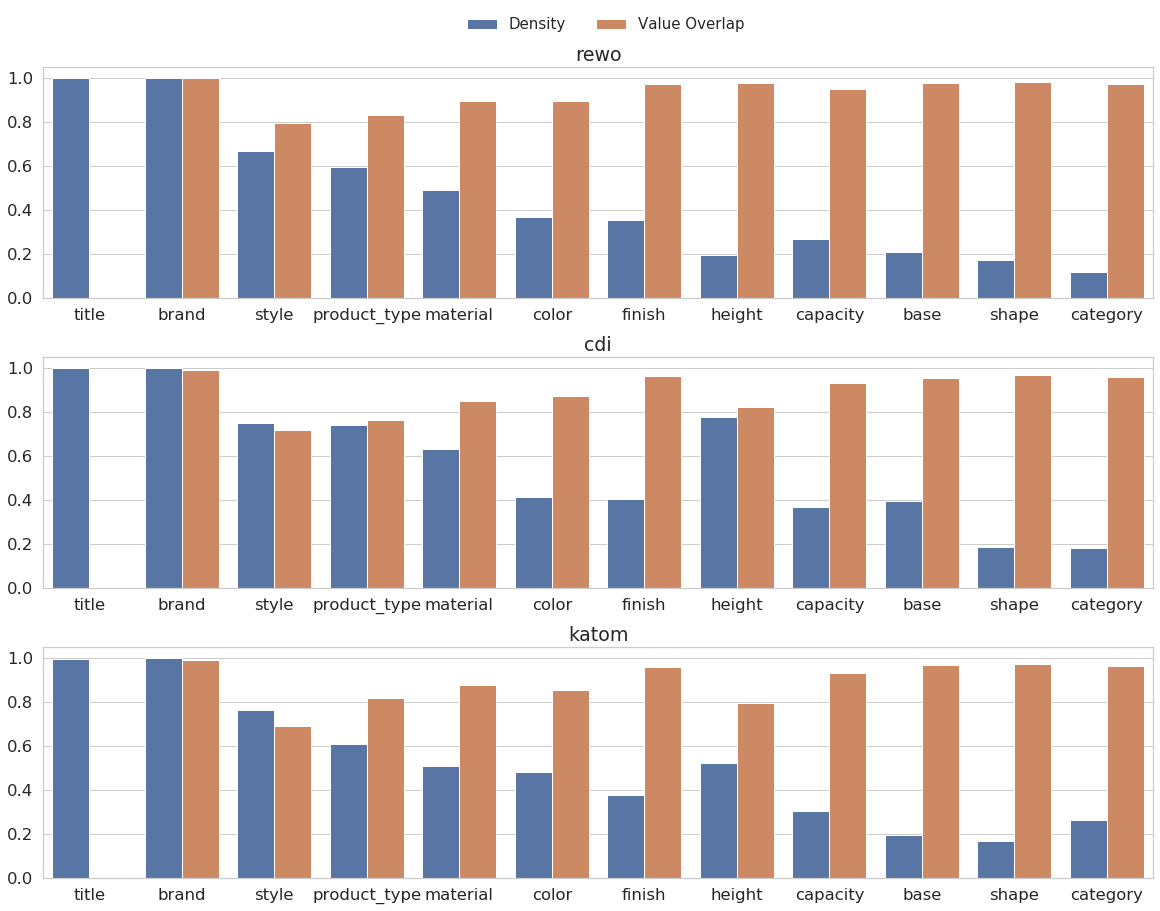

In [81]:
fig,axes = plt.subplots(3,1,figsize=(16,12),constrained_layout=True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g = sns.barplot(x='attr',y='values',data=dfs_d_vp['rewo'],hue='dimension',ax=axes[0])
axes[0].set_title('rewo')
g.legend_.remove()
axes[0].set_ylabel('')
axes[0].set_xlabel('')
g = sns.barplot(x='attr',y='values',data=dfs_d_vp['cdi'],hue='dimension',ax=axes[1])
axes[1].set_title('cdi')
g.legend_.remove()
axes[1].set_ylabel('')
axes[1].set_xlabel('')
g = sns.barplot(x='attr',y='values',data=dfs_d_vp['katom'],hue='dimension',ax=axes[2])
axes[2].set_title('katom')
g.legend_.remove()
axes[2].set_ylabel('')
axes[2].set_xlabel('')
#plt.legend(loc='best')
lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=2,
            borderaxespad=0, frameon=False, fontsize=15)
#ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
#            borderaxespad=0, frameon=False)
#fig.suptitle('Attribute Profiling')
#fig.savefig('../results/data_profiling/kitchen/kitchen_dslevel_den_vp.png',dpi=600,bbox_inches='tight')

In [82]:
result = pd.DataFrame()
for df in datasets:
    ds = datasets[df].drop(columns=[df+'_id',df+'_cluster_id',df+'_blocking_key',df+'_description'])
    ds.replace(np.nan,'nan',inplace=True)
    temp = pd.DataFrame()
    temp['source'] = ds.apply(lambda x: df,axis=1)
    for col in ds:
        temp[col.split('_')[1]] = ds[col].apply(lambda s: len(s) if s!='nan' else np.nan)
    result = result.append(temp)
result = pd.melt(result, id_vars='source', var_name="attr", value_name="values")

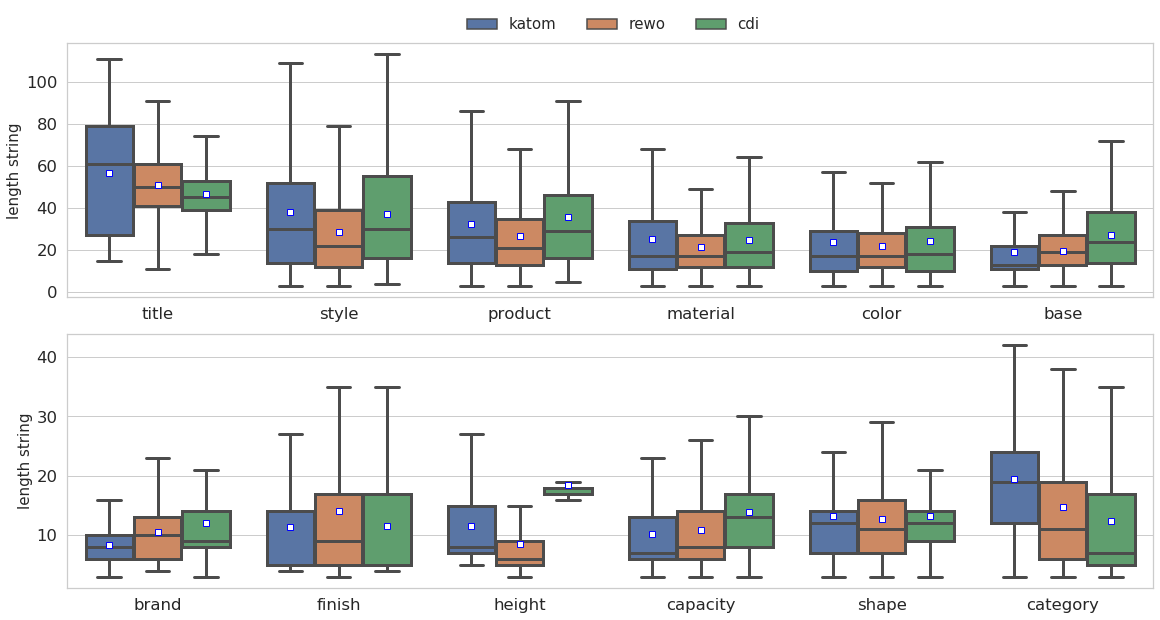

In [83]:
fig,axes = plt.subplots(2,1,figsize=(16,8),constrained_layout=True)

g = sns.boxplot(x='attr',y='values',data=result[(result['attr']!='brand') & (result['attr']!='finish') & (result['attr']!='height') & (result['attr']!='capacity') & (result['attr']!='shape') & (result['attr']!='category')],
                hue='source',ax=axes[0], showfliers = False,showmeans=True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
g.legend_.remove()
axes[0].set_ylabel('length string',fontsize=15)
axes[0].set_xlabel('')

g = sns.boxplot(x='attr',y='values',data=result[(result['attr']=='brand') | (result['attr']=='finish') | (result['attr']=='height') | (result['attr']=='capacity') | (result['attr']=='shape') | (result['attr']=='category')],
                hue='source',ax=axes[1], showfliers = False,showmeans=True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
g.legend_.remove()
axes[1].set_ylabel('length string',fontsize=15)
axes[1].set_xlabel('')

lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=3,
            borderaxespad=0, frameon=False, fontsize=15)

#fig.suptitle('Attribute Length')
#fig.savefig('../results/data_profiling/kitchen/kitchen_dslevel_attr_length.png',dpi=600,bbox_inches='tight')

### Candidate set-level

In [84]:
results_non_agg = {}
for df in candsets:
    temp = pd.DataFrame()
    temp['label']  = candsets[df]['label'].apply(lambda s: 'match' if s==1 else 'non-match')
    for attr in datatype_dict:
        temp[attr] = candsets[df].replace(-1,np.nan).filter(regex=attr).mean(axis=1,skipna=True)
    results_non_agg.update({df:pd.melt(temp, id_vars='label', var_name="attr", value_name="values")})

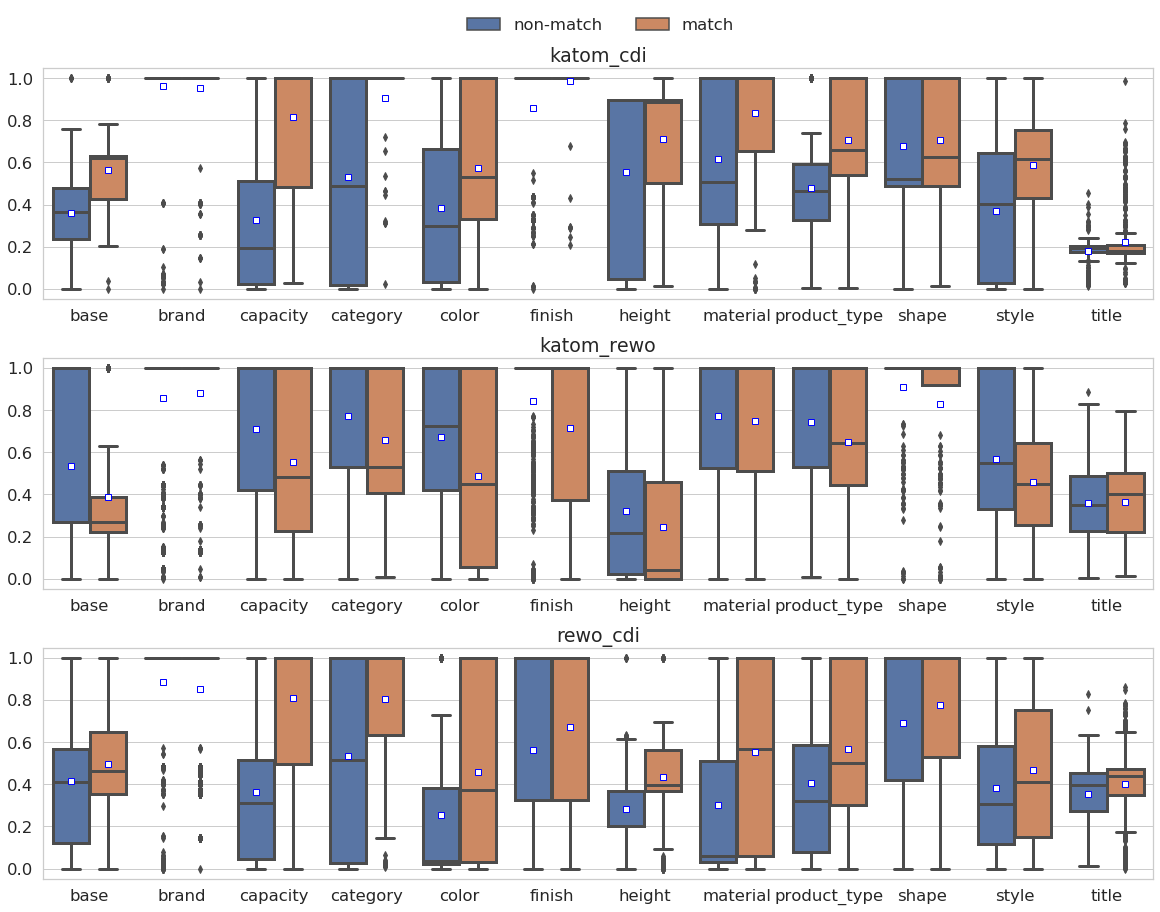

In [85]:
fig,axes = plt.subplots(3,1,figsize=(16,12),constrained_layout=True)

g = sns.boxplot(x='attr',y='values',data=results_non_agg['katom_cdi'],hue='label',ax=axes[0],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[0].set_title('katom_cdi')
g.legend_.remove()
axes[0].set_ylabel('')
axes[0].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['katom_rewo'],hue='label',ax=axes[1],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[1].set_title('katom_rewo')
g.legend_.remove()
axes[1].set_ylabel('')
axes[1].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['rewo_cdi'],hue='label',ax=axes[2],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[2].set_title('rewo_cdi')
g.legend_.remove()
axes[2].set_ylabel('')
axes[2].set_xlabel('')

lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=2,
            borderaxespad=0, frameon=False)

#fig.savefig('../results/data_profiling/kitchen/kitchen_cslevel_agg_sim_score_hue.png',dpi=600,bbox_inches='tight')

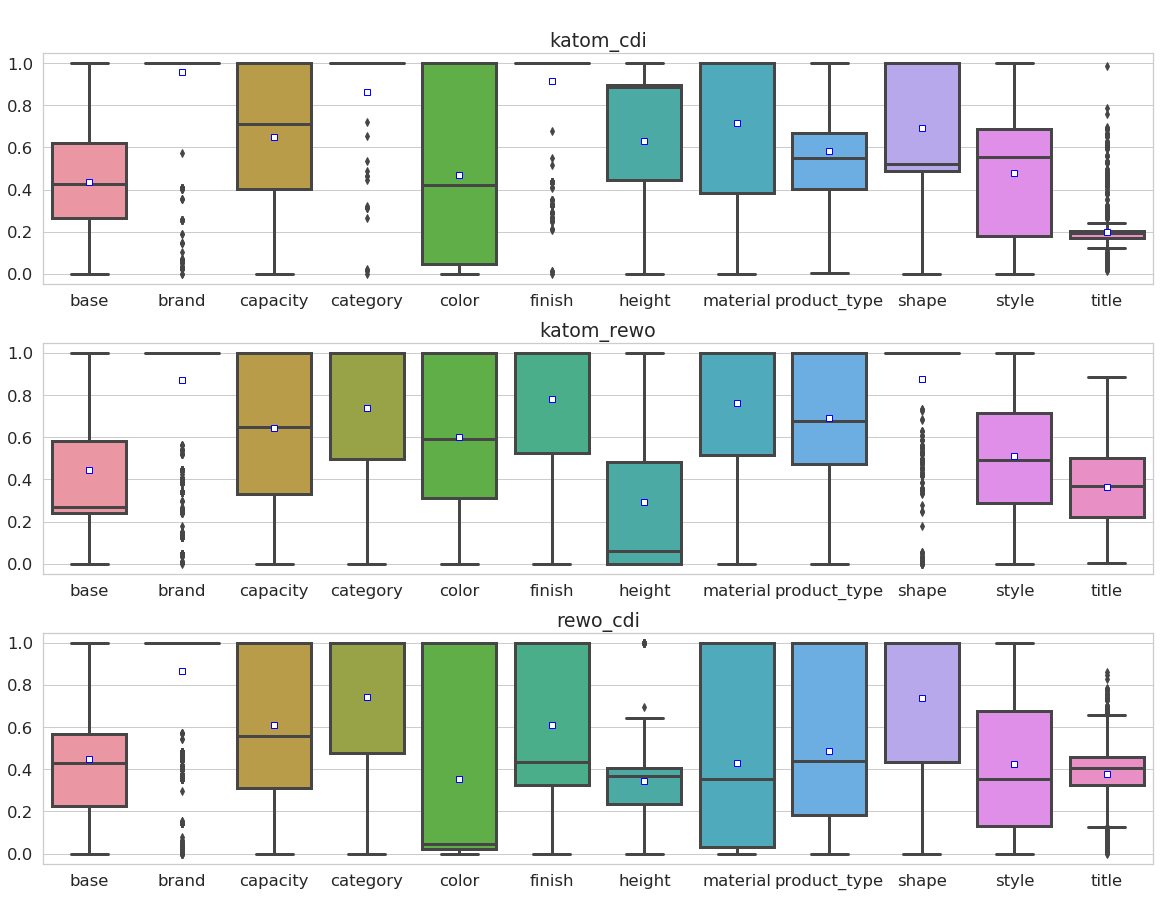

In [86]:
fig,axes = plt.subplots(3,1,figsize=(16,12),constrained_layout=True)

g = sns.boxplot(x='attr',y='values',data=results_non_agg['katom_cdi'],ax=axes[0],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[0].set_title('katom_cdi')
axes[0].set_ylabel('')
axes[0].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['katom_rewo'],ax=axes[1],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[1].set_title('katom_rewo')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
g = sns.boxplot(x='attr',y='values',data=results_non_agg['rewo_cdi'],ax=axes[2],showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
axes[2].set_title('rewo_cdi')
axes[2].set_ylabel('')
axes[2].set_xlabel('')

lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='lower left', bbox_to_anchor= (0.4, 1.01), ncol=2,
            borderaxespad=0, frameon=False)

#fig.suptitle('Agg. Sim Scores per Attribute separated by Label')
#fig.savefig('../results/data_profiling/kitchen/kitchen_cslevel_agg_sim_score.png',dpi=600,bbox_inches='tight')

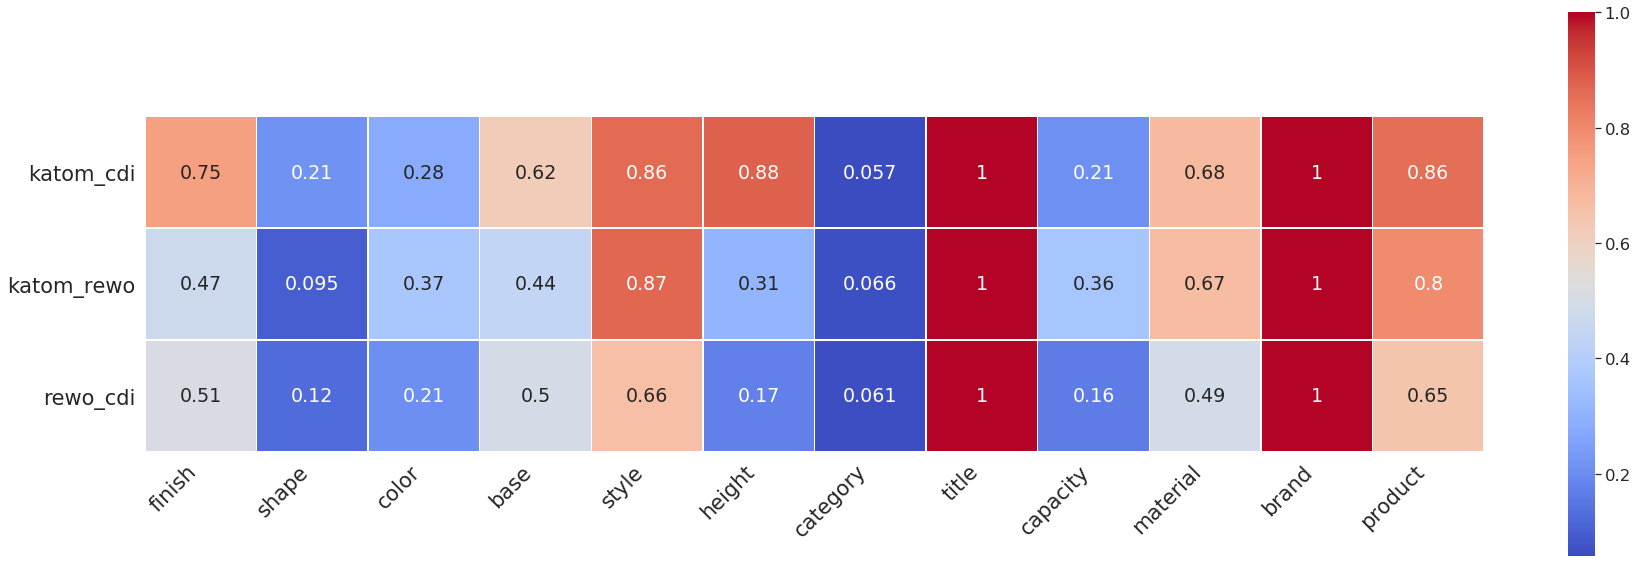

In [87]:
all_nan_share = []
for i,df in enumerate(candsets):
    if(i==0):
        temp = candsets[df].copy()
        temp['source'] = temp.iloc[:,0].apply(lambda x: df)
        final = temp
    temp = candsets[df].copy()
    temp['source'] = temp.iloc[:,0].apply(lambda x: df)
    final = final.append(temp)
try:
    #final.drop(columns='ids',inplace=True)
    final.drop(columns='label',inplace=True)
except KeyError:
    pass
all_nan_share = final.replace(-1,np.nan).groupby('source').count().div(final.replace(-1,np.nan).groupby('source').count().iloc[:,0],axis='index')
mapper = {}
for col in final.columns:
    mapper.update({col:col.split('_')[0]})
all_nan_share.rename(columns=mapper,inplace=True)
all_nan_share = all_nan_share.loc[:,~all_nan_share.columns.duplicated()]
plt.figure(figsize=(30,10))
g = sns.heatmap(all_nan_share.drop(columns='ids'),annot=True,square=True,cmap='coolwarm',linewidths=.5)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=21)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=21)
#g.set_title('Density of Attributes for all Candidate Sets')
g.set_ylabel('')
fig = g.get_figure()
#fig.savefig('../results/data_profiling/kitchen/kitchen_cslevel_attr_density_heatmap.png',dpi=600,bbox_inches='tight')

## Data Profiling of Correspondences Set (aka candset)

### Data Profiling katom_cdi

In [88]:
ds1_name = 'katom'
ds2_name = 'cdi'
combo = '{}_{}'.format(ds1_name,ds2_name)

#### All Feature

##### Training Set

In [89]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_train[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]
data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [90]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Training Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/kitchen/{combo}_summary_table_train.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=katom ds2=cdi Training Set
#ds1,25635
#ds2,7677
#record_pairs,900
#attr,14
#non-match,450
#match,450
ratio_pos,0.5
ratio_neg,0.5
#short_string_attr,10
#long_string_attr,2


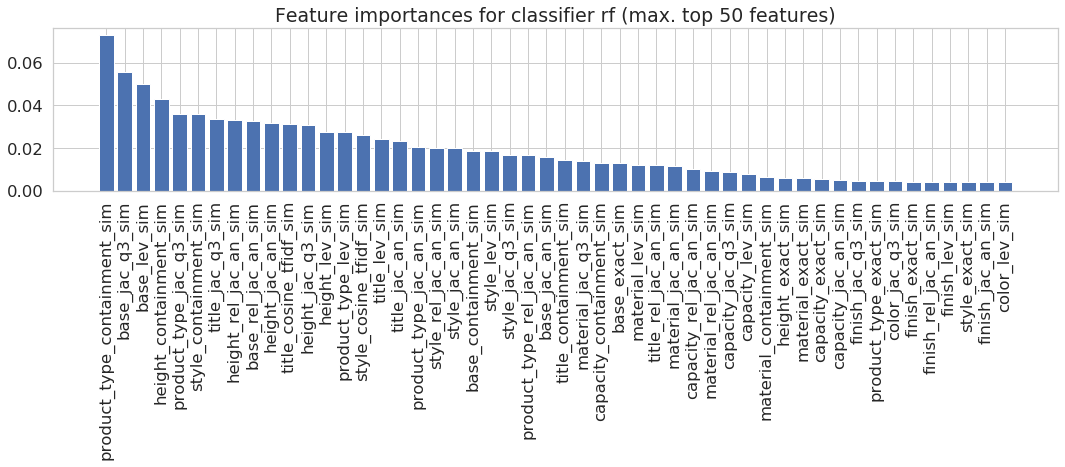

In [91]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [92]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Training Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/kitchen/{combo}_profiling_all_feature_train.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: katom_cdi Training Set
matching_relevant_features,"['product_type_containment_sim', 'base_jac_q3_sim', 'base_lev_sim', 'height_containment_sim', 'product_type_jac_q3_sim', 'style_containment_sim', 'title_jac_q3_sim', 'height_rel_jac_an_sim', 'base_rel_jac_an_sim', 'height_jac_an_sim', 'title_cosine_tfidf_sim', 'height_jac_q3_sim', 'height_lev_sim', 'product_type_lev_sim', 'style_cosine_tfidf_sim', 'title_lev_sim', 'title_jac_an_sim', 'product_type_jac_an_sim', 'style_rel_jac_an_sim', 'style_jac_an_sim', 'base_containment_sim', 'style_lev_sim', 'style_jac_q3_sim', 'product_type_rel_jac_an_sim', 'base_jac_an_sim', 'title_containment_sim', 'material_jac_q3_sim', 'capacity_containment_sim', 'base_exact_sim', 'material_lev_sim', 'title_rel_jac_an_sim', 'material_jac_an_sim', 'capacity_rel_jac_an_sim', 'material_rel_jac_an_sim', 'capacity_jac_q3_sim', 'capacity_lev_sim', 'material_containment_sim', 'height_exact_sim', 'material_exact_sim', 'capacity_exact_sim', 'capacity_jac_an_sim']"
matching_relevant_attributes_datatypes,"{'long_str', 'str'}"
matching_relevant_attributes,"{'title', 'style', 'height', 'product_type', 'material', 'base', 'capacity'}"
matching_relevant_attributes_count,7
matching_relevant_attributes_density,0.730000
top_matching_relevant_features_count,4
F1_xval_max,0.910000
F1_xval_top_matching_relevant_features,0.890000
top_matching_relevant_features,"['product_type_containment_sim', 'base_jac_q3_sim', 'base_lev_sim', 'height_containment_sim']"
top_relevant_attributes,"{'base', 'height', 'product_type'}"


##### Test Set

In [93]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_test[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [94]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Test Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/kitchen/{combo}_summary_table_test.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=katom ds2=cdi Test Set
#ds1,25635
#ds2,7677
#record_pairs,444
#attr,14
#non-match,222
#match,222
ratio_pos,0.5
ratio_neg,0.5
#short_string_attr,10
#long_string_attr,2


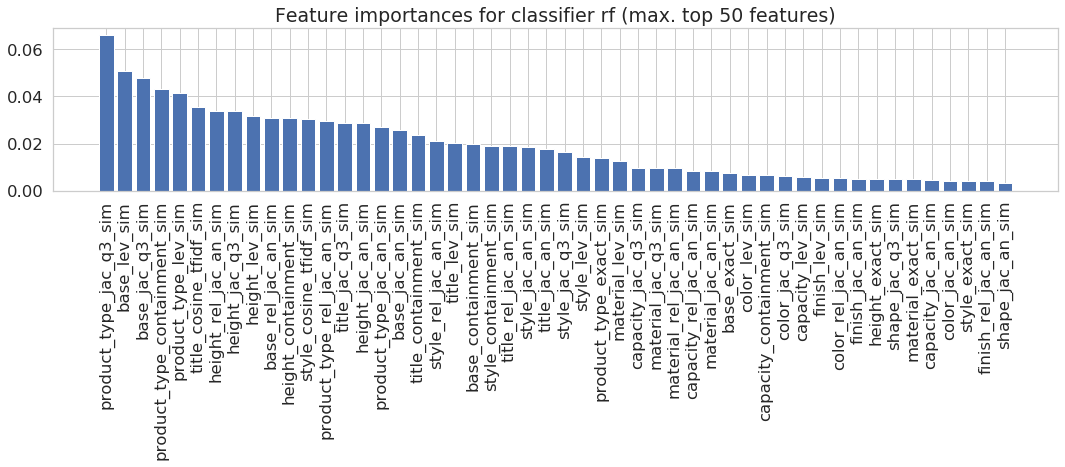

In [95]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [96]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Test Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/kitchen/{combo}_profiling_all_feature_test.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: katom_cdi Test Set
matching_relevant_features,"['product_type_jac_q3_sim', 'base_lev_sim', 'base_jac_q3_sim', 'product_type_containment_sim', 'product_type_lev_sim', 'title_cosine_tfidf_sim', 'height_rel_jac_an_sim', 'height_jac_q3_sim', 'height_lev_sim', 'base_rel_jac_an_sim', 'height_containment_sim', 'style_cosine_tfidf_sim', 'product_type_rel_jac_an_sim', 'title_jac_q3_sim', 'height_jac_an_sim', 'product_type_jac_an_sim', 'base_jac_an_sim', 'title_containment_sim', 'style_rel_jac_an_sim', 'title_lev_sim', 'base_containment_sim', 'style_containment_sim', 'title_rel_jac_an_sim', 'style_jac_an_sim', 'title_jac_an_sim', 'style_jac_q3_sim', 'style_lev_sim', 'product_type_exact_sim', 'material_lev_sim', 'capacity_jac_q3_sim', 'material_jac_q3_sim', 'material_rel_jac_an_sim', 'capacity_rel_jac_an_sim', 'material_jac_an_sim', 'base_exact_sim', 'color_lev_sim', 'capacity_containment_sim', 'color_jac_q3_sim', 'capacity_lev_sim', 'finish_lev_sim', 'color_rel_jac_an_sim', 'finish_jac_an_sim', 'height_exact_sim', 'shape_jac_q3_sim']"
matching_relevant_attributes_datatypes,"{'long_str', 'str'}"
matching_relevant_attributes,"{'title', 'style', 'color', 'finish', 'height', 'product_type', 'shape', 'material', 'base', 'capacity'}"
matching_relevant_attributes_count,10
matching_relevant_attributes_density,0.720000
top_matching_relevant_features_count,8
F1_xval_max,0.940000
F1_xval_top_matching_relevant_features,0.920000
top_matching_relevant_features,"['product_type_jac_q3_sim', 'base_lev_sim', 'base_jac_q3_sim', 'product_type_containment_sim', 'product_type_lev_sim', 'title_cosine_tfidf_sim', 'height_rel_jac_an_sim', 'height_jac_q3_sim']"
top_relevant_attributes,"{'base', 'height', 'product_type', 'title'}"


##### The whole Dataset

In [97]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [98]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Whole Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/kitchen/{combo}_summary_table_whole_set.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=katom ds2=cdi Whole Set
#ds1,25635
#ds2,7677
#record_pairs,1344
#attr,14
#non-match,672
#match,672
ratio_pos,0.5
ratio_neg,0.5
#short_string_attr,10
#long_string_attr,2


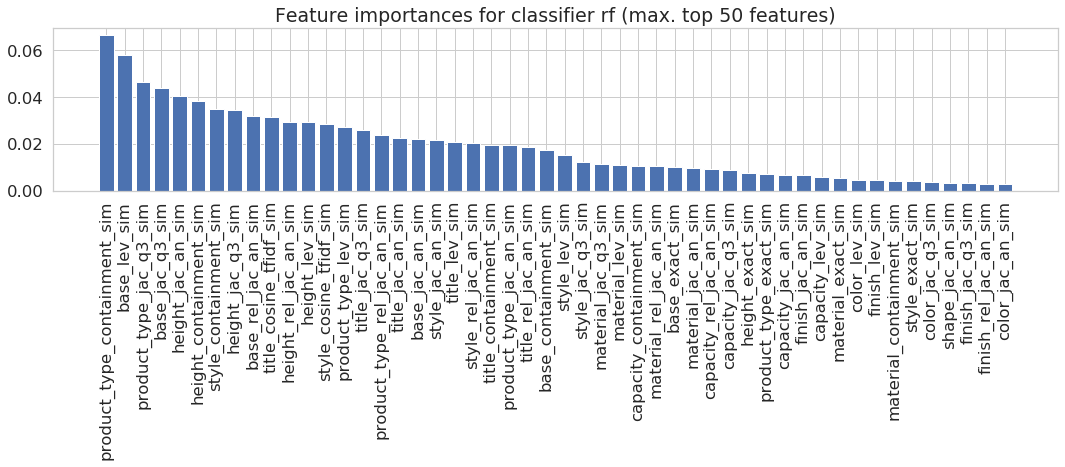

In [99]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [100]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Whole Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/kitchen/{combo}_profiling_all_feature_whole_set.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: katom_cdi Whole Set
matching_relevant_features,"['product_type_containment_sim', 'base_lev_sim', 'product_type_jac_q3_sim', 'base_jac_q3_sim', 'height_jac_an_sim', 'height_containment_sim', 'style_containment_sim', 'height_jac_q3_sim', 'base_rel_jac_an_sim', 'title_cosine_tfidf_sim', 'height_rel_jac_an_sim', 'height_lev_sim', 'style_cosine_tfidf_sim', 'product_type_lev_sim', 'title_jac_q3_sim', 'product_type_rel_jac_an_sim', 'title_jac_an_sim', 'base_jac_an_sim', 'style_jac_an_sim', 'title_lev_sim', 'style_rel_jac_an_sim', 'title_containment_sim', 'product_type_jac_an_sim', 'title_rel_jac_an_sim', 'base_containment_sim', 'style_lev_sim', 'style_jac_q3_sim', 'material_jac_q3_sim', 'material_lev_sim', 'capacity_containment_sim', 'material_rel_jac_an_sim', 'base_exact_sim', 'material_jac_an_sim', 'capacity_rel_jac_an_sim', 'capacity_jac_q3_sim', 'height_exact_sim', 'product_type_exact_sim', 'capacity_jac_an_sim', 'finish_jac_an_sim', 'capacity_lev_sim', 'material_exact_sim']"
matching_relevant_attributes_datatypes,"{'long_str', 'str'}"
matching_relevant_attributes,"{'title', 'style', 'finish', 'height', 'product_type', 'material', 'base', 'capacity'}"
matching_relevant_attributes_count,8
matching_relevant_attributes_density,0.740000
top_matching_relevant_features_count,6
F1_xval_max,0.920000
F1_xval_top_matching_relevant_features,0.880000
top_matching_relevant_features,"['product_type_containment_sim', 'base_lev_sim', 'product_type_jac_q3_sim', 'base_jac_q3_sim', 'height_jac_an_sim', 'height_containment_sim']"
top_relevant_attributes,"{'base', 'height', 'product_type'}"


### Data Profiling rewo_cdi

In [101]:
ds1_name = 'rewo'
ds2_name = 'cdi'
combo = '{}_{}'.format(ds1_name,ds2_name)

#### All Feature

##### Training Set

In [102]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_train[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]
data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [103]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Training Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/kitchen/{combo}_summary_table_train.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=rewo ds2=cdi Training Set
#ds1,82385
#ds2,7677
#record_pairs,3569
#attr,14
#non-match,1784
#match,1785
ratio_pos,0.50014
ratio_neg,0.49986
#short_string_attr,10
#long_string_attr,2


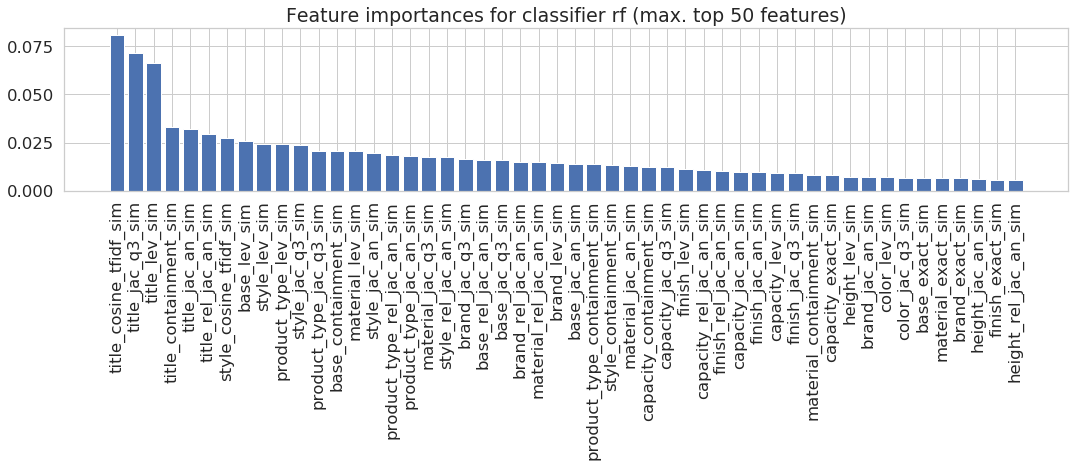

In [104]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [105]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Training Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/kitchen/{combo}_profiling_all_feature_train.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: rewo_cdi Training Set
matching_relevant_features,"['title_cosine_tfidf_sim', 'title_jac_q3_sim', 'title_lev_sim', 'title_containment_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'style_cosine_tfidf_sim', 'base_lev_sim', 'style_lev_sim', 'product_type_lev_sim', 'style_jac_q3_sim', 'product_type_jac_q3_sim', 'base_containment_sim', 'material_lev_sim', 'style_jac_an_sim', 'product_type_rel_jac_an_sim', 'product_type_jac_an_sim', 'material_jac_q3_sim', 'style_rel_jac_an_sim', 'brand_jac_q3_sim', 'base_rel_jac_an_sim', 'base_jac_q3_sim', 'brand_rel_jac_an_sim', 'material_rel_jac_an_sim', 'brand_lev_sim', 'base_jac_an_sim', 'product_type_containment_sim', 'style_containment_sim', 'material_jac_an_sim', 'capacity_containment_sim', 'capacity_jac_q3_sim', 'finish_lev_sim', 'capacity_rel_jac_an_sim', 'finish_rel_jac_an_sim', 'capacity_jac_an_sim', 'finish_jac_an_sim', 'capacity_lev_sim', 'finish_jac_q3_sim', 'material_containment_sim', 'capacity_exact_sim', 'height_lev_sim', 'brand_jac_an_sim', 'color_lev_sim', 'color_jac_q3_sim', 'base_exact_sim', 'material_exact_sim', 'brand_exact_sim', 'height_jac_an_sim', 'finish_exact_sim', 'height_rel_jac_an_sim']"
matching_relevant_attributes_datatypes,"{'long_str', 'str'}"
matching_relevant_attributes,"{'title', 'style', 'color', 'finish', 'brand', 'product_type', 'height', 'material', 'base', 'capacity'}"
matching_relevant_attributes_count,10
matching_relevant_attributes_density,0.580000
top_matching_relevant_features_count,8
F1_xval_max,0.850000
F1_xval_top_matching_relevant_features,0.810000
top_matching_relevant_features,"['title_cosine_tfidf_sim', 'title_jac_q3_sim', 'title_lev_sim', 'title_containment_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'style_cosine_tfidf_sim', 'base_lev_sim']"
top_relevant_attributes,"{'base', 'style', 'title'}"


##### Test Set

In [106]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_test[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [107]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Test Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/kitchen/{combo}_summary_table_test.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=rewo ds2=cdi Test Set
#ds1,82385
#ds2,7677
#record_pairs,1759
#attr,14
#non-match,880
#match,879
ratio_pos,0.499716
ratio_neg,0.500284
#short_string_attr,10
#long_string_attr,2


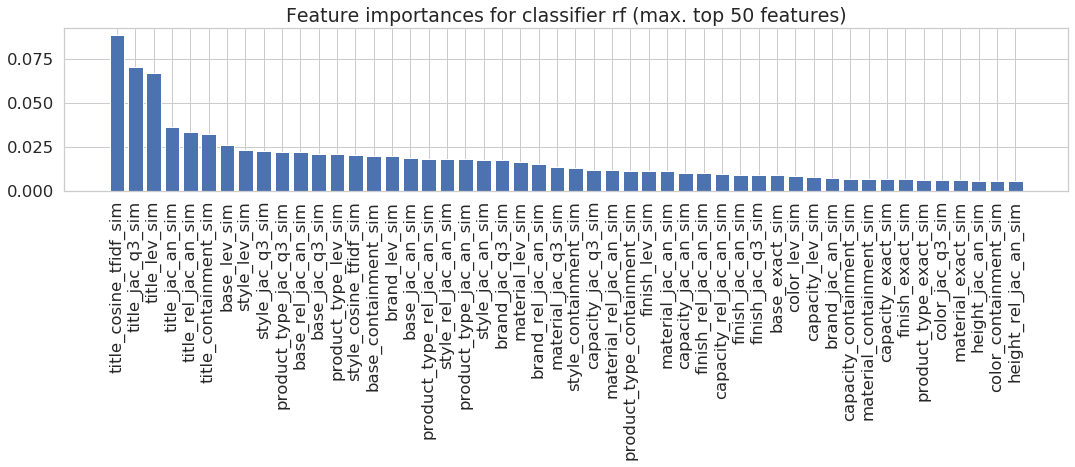

In [108]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [109]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Test Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/kitchen/{combo}_profiling_all_feature_test.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: rewo_cdi Test Set
matching_relevant_features,"['title_cosine_tfidf_sim', 'title_jac_q3_sim', 'title_lev_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_containment_sim', 'base_lev_sim', 'style_lev_sim', 'style_jac_q3_sim', 'product_type_jac_q3_sim', 'base_rel_jac_an_sim', 'base_jac_q3_sim', 'product_type_lev_sim', 'style_cosine_tfidf_sim', 'base_containment_sim', 'brand_lev_sim', 'base_jac_an_sim', 'product_type_rel_jac_an_sim', 'style_rel_jac_an_sim', 'product_type_jac_an_sim', 'style_jac_an_sim', 'brand_jac_q3_sim', 'material_lev_sim', 'brand_rel_jac_an_sim', 'material_jac_q3_sim', 'style_containment_sim', 'capacity_jac_q3_sim', 'material_rel_jac_an_sim', 'product_type_containment_sim', 'finish_lev_sim', 'material_jac_an_sim', 'capacity_jac_an_sim', 'finish_rel_jac_an_sim', 'capacity_rel_jac_an_sim', 'finish_jac_an_sim', 'finish_jac_q3_sim', 'base_exact_sim', 'color_lev_sim', 'capacity_lev_sim', 'brand_jac_an_sim', 'capacity_containment_sim', 'material_containment_sim', 'capacity_exact_sim', 'finish_exact_sim', 'product_type_exact_sim', 'color_jac_q3_sim', 'material_exact_sim', 'height_jac_an_sim', 'color_containment_sim', 'height_rel_jac_an_sim']"
matching_relevant_attributes_datatypes,"{'long_str', 'str'}"
matching_relevant_attributes,"{'title', 'style', 'color', 'finish', 'brand', 'product_type', 'height', 'material', 'base', 'capacity'}"
matching_relevant_attributes_count,10
matching_relevant_attributes_density,0.560000
top_matching_relevant_features_count,19
F1_xval_max,0.830000
F1_xval_top_matching_relevant_features,0.790000
top_matching_relevant_features,"['title_cosine_tfidf_sim', 'title_jac_q3_sim', 'title_lev_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_containment_sim', 'base_lev_sim', 'style_lev_sim', 'style_jac_q3_sim', 'product_type_jac_q3_sim', 'base_rel_jac_an_sim', 'base_jac_q3_sim', 'product_type_lev_sim', 'style_cosine_tfidf_sim', 'base_containment_sim', 'brand_lev_sim', 'base_jac_an_sim', 'product_type_rel_jac_an_sim', 'style_rel_jac_an_sim']"
top_relevant_attributes,"{'title', 'style', 'brand', 'product_type', 'base'}"


##### The whole Dataset

In [110]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [111]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Whole Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/kitchen/{combo}_summary_table_whole_set.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=rewo ds2=cdi Whole Set
#ds1,82385
#ds2,7677
#record_pairs,5328
#attr,14
#non-match,2664
#match,2664
ratio_pos,0.5
ratio_neg,0.5
#short_string_attr,10
#long_string_attr,2


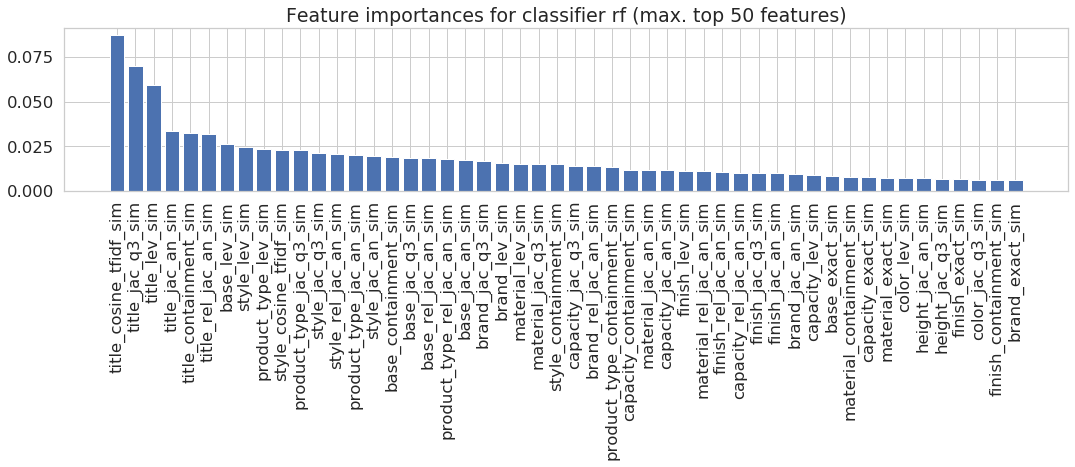

In [112]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [113]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Whole Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/kitchen/{combo}_profiling_all_feature_whole_set.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: rewo_cdi Whole Set
matching_relevant_features,"['title_cosine_tfidf_sim', 'title_jac_q3_sim', 'title_lev_sim', 'title_jac_an_sim', 'title_containment_sim', 'title_rel_jac_an_sim', 'base_lev_sim', 'style_lev_sim', 'product_type_lev_sim', 'style_cosine_tfidf_sim', 'product_type_jac_q3_sim', 'style_jac_q3_sim', 'style_rel_jac_an_sim', 'product_type_jac_an_sim', 'style_jac_an_sim', 'base_containment_sim', 'base_jac_q3_sim', 'base_rel_jac_an_sim', 'product_type_rel_jac_an_sim', 'base_jac_an_sim', 'brand_jac_q3_sim', 'brand_lev_sim', 'material_lev_sim', 'material_jac_q3_sim', 'style_containment_sim', 'capacity_jac_q3_sim', 'brand_rel_jac_an_sim', 'product_type_containment_sim', 'capacity_containment_sim', 'material_jac_an_sim', 'capacity_jac_an_sim', 'finish_lev_sim', 'material_rel_jac_an_sim', 'finish_rel_jac_an_sim', 'capacity_rel_jac_an_sim', 'finish_jac_q3_sim', 'finish_jac_an_sim', 'brand_jac_an_sim', 'capacity_lev_sim', 'base_exact_sim', 'material_containment_sim', 'capacity_exact_sim', 'material_exact_sim', 'color_lev_sim', 'height_jac_an_sim', 'height_jac_q3_sim', 'finish_exact_sim', 'color_jac_q3_sim', 'finish_containment_sim', 'brand_exact_sim']"
matching_relevant_attributes_datatypes,"{'long_str', 'str'}"
matching_relevant_attributes,"{'title', 'style', 'color', 'finish', 'brand', 'product_type', 'height', 'material', 'base', 'capacity'}"
matching_relevant_attributes_count,10
matching_relevant_attributes_density,0.580000
top_matching_relevant_features_count,9
F1_xval_max,0.850000
F1_xval_top_matching_relevant_features,0.820000
top_matching_relevant_features,"['title_cosine_tfidf_sim', 'title_jac_q3_sim', 'title_lev_sim', 'title_jac_an_sim', 'title_containment_sim', 'title_rel_jac_an_sim', 'base_lev_sim', 'style_lev_sim', 'product_type_lev_sim']"
top_relevant_attributes,"{'base', 'product_type', 'style', 'title'}"


### Data Profiling katom_rewo

In [114]:
ds1_name = 'katom'
ds2_name = 'rewo'
combo = '{}_{}'.format(ds1_name,ds2_name)

#### All Feature

##### Training Set

In [115]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_train[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]
data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [116]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Training Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/kitchen/{combo}_summary_table_train.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=katom ds2=rewo Training Set
#ds1,25635
#ds2,82385
#record_pairs,4326
#attr,14
#non-match,2181
#match,2145
ratio_pos,0.495839
ratio_neg,0.504161
#short_string_attr,10
#long_string_attr,2


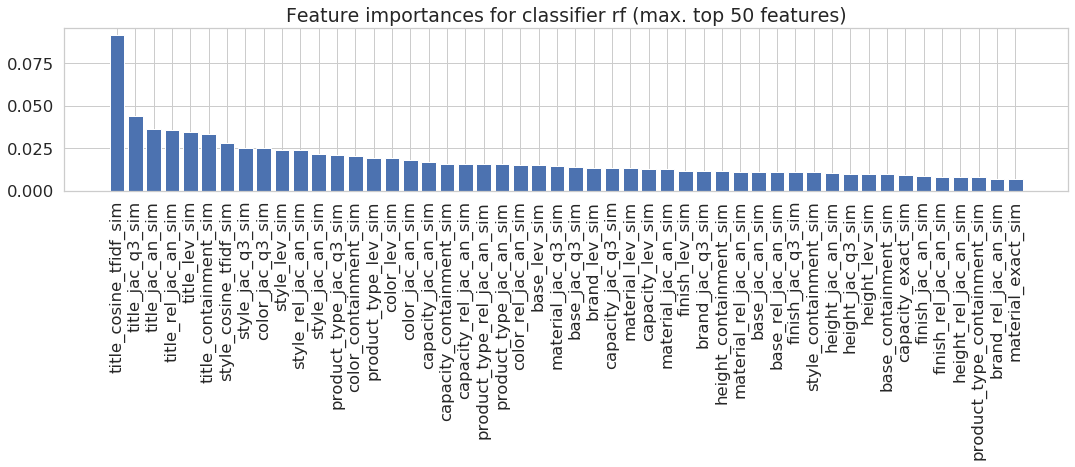

In [117]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [118]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Training Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/kitchen/{combo}_profiling_all_feature_train.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: katom_rewo Training Set
matching_relevant_features,"['title_cosine_tfidf_sim', 'title_jac_q3_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_lev_sim', 'title_containment_sim', 'style_cosine_tfidf_sim', 'style_jac_q3_sim', 'color_jac_q3_sim', 'style_lev_sim', 'style_rel_jac_an_sim', 'style_jac_an_sim', 'product_type_jac_q3_sim', 'color_containment_sim', 'product_type_lev_sim', 'color_lev_sim', 'color_jac_an_sim', 'capacity_jac_an_sim', 'capacity_containment_sim', 'capacity_rel_jac_an_sim', 'product_type_rel_jac_an_sim', 'product_type_jac_an_sim', 'color_rel_jac_an_sim', 'base_lev_sim', 'material_jac_q3_sim', 'base_jac_q3_sim', 'brand_lev_sim', 'capacity_jac_q3_sim', 'material_lev_sim', 'capacity_lev_sim', 'material_jac_an_sim', 'finish_lev_sim', 'brand_jac_q3_sim', 'height_containment_sim', 'material_rel_jac_an_sim', 'base_jac_an_sim', 'base_rel_jac_an_sim', 'finish_jac_q3_sim', 'style_containment_sim', 'height_jac_an_sim', 'height_jac_q3_sim', 'height_lev_sim', 'base_containment_sim', 'capacity_exact_sim', 'finish_jac_an_sim', 'finish_rel_jac_an_sim', 'height_rel_jac_an_sim', 'product_type_containment_sim', 'brand_rel_jac_an_sim', 'material_exact_sim']"
matching_relevant_attributes_datatypes,"{'long_str', 'str'}"
matching_relevant_attributes,"{'title', 'color', 'style', 'finish', 'brand', 'product_type', 'height', 'material', 'base', 'capacity'}"
matching_relevant_attributes_count,10
matching_relevant_attributes_density,0.620000
top_matching_relevant_features_count,7
F1_xval_max,0.850000
F1_xval_top_matching_relevant_features,0.810000
top_matching_relevant_features,"['title_cosine_tfidf_sim', 'title_jac_q3_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_lev_sim', 'title_containment_sim', 'style_cosine_tfidf_sim']"
top_relevant_attributes,"{'style', 'title'}"


##### Test Set

In [119]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets_test[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [120]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Test Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/kitchen/{combo}_summary_table_test.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=katom ds2=rewo Test Set
#ds1,25635
#ds2,82385
#record_pairs,2131
#attr,14
#non-match,1075
#match,1056
ratio_pos,0.495542
ratio_neg,0.504458
#short_string_attr,10
#long_string_attr,2


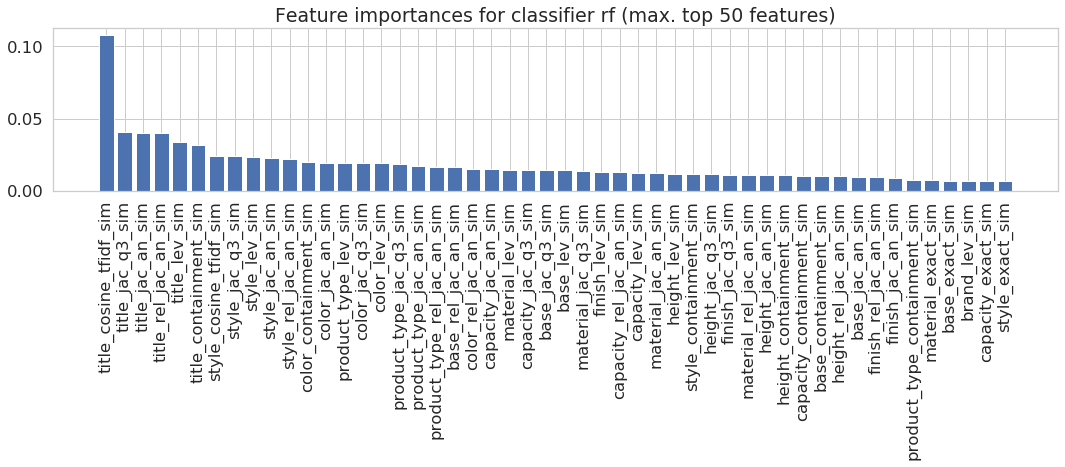

In [121]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [122]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Test Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/kitchen/{combo}_profiling_all_feature_test.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: katom_rewo Test Set
matching_relevant_features,"['title_cosine_tfidf_sim', 'title_jac_q3_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_lev_sim', 'title_containment_sim', 'style_cosine_tfidf_sim', 'style_jac_q3_sim', 'style_lev_sim', 'style_jac_an_sim', 'style_rel_jac_an_sim', 'color_containment_sim', 'color_jac_an_sim', 'product_type_lev_sim', 'color_jac_q3_sim', 'color_lev_sim', 'product_type_jac_q3_sim', 'product_type_jac_an_sim', 'product_type_rel_jac_an_sim', 'base_rel_jac_an_sim', 'color_rel_jac_an_sim', 'capacity_jac_an_sim', 'material_lev_sim', 'capacity_jac_q3_sim', 'base_jac_q3_sim', 'base_lev_sim', 'material_jac_q3_sim', 'finish_lev_sim', 'capacity_rel_jac_an_sim', 'capacity_lev_sim', 'material_jac_an_sim', 'height_lev_sim', 'style_containment_sim', 'height_jac_q3_sim', 'finish_jac_q3_sim', 'material_rel_jac_an_sim', 'height_jac_an_sim', 'height_containment_sim', 'capacity_containment_sim', 'base_containment_sim', 'height_rel_jac_an_sim', 'base_jac_an_sim', 'finish_rel_jac_an_sim', 'finish_jac_an_sim', 'product_type_containment_sim', 'material_exact_sim', 'base_exact_sim', 'brand_lev_sim', 'capacity_exact_sim', 'style_exact_sim']"
matching_relevant_attributes_datatypes,"{'long_str', 'str'}"
matching_relevant_attributes,"{'title', 'color', 'style', 'finish', 'height', 'product_type', 'brand', 'material', 'base', 'capacity'}"
matching_relevant_attributes_count,10
matching_relevant_attributes_density,0.610000
top_matching_relevant_features_count,12
F1_xval_max,0.820000
F1_xval_top_matching_relevant_features,0.780000
top_matching_relevant_features,"['title_cosine_tfidf_sim', 'title_jac_q3_sim', 'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_lev_sim', 'title_containment_sim', 'style_cosine_tfidf_sim', 'style_jac_q3_sim', 'style_lev_sim', 'style_jac_an_sim', 'style_rel_jac_an_sim', 'color_containment_sim']"
top_relevant_attributes,"{'color', 'style', 'title'}"


##### The whole Dataset

In [123]:
ds1 = datasets[ds1_name].copy()
ds2 = datasets[ds2_name].copy()
ds1.rename({ds1_name+'_id':ds1_name+'_ids'},axis=1,inplace=True)
ds2.rename({ds2_name+'_id':ds2_name+'_ids'},axis=1,inplace=True)
candset = candsets[combo].copy()
identifier = ['ids','cluster_id']
col_ds1 = ['_'.join(x.split('_')[1:]) for x in ds1.columns]
col_ds2 = ['_'.join(x.split('_')[1:]) for x in ds2.columns]
ds1.columns = col_ds1
ds2.columns = col_ds2
common_attributes = [x for x in col_ds1 if x in col_ds2 and x not in identifier]

data_profiling = dex.DataProfiling(ds1, ds2, candset, all_feature, common_attributes, datatype_dict)

In [124]:
data_profiling.getSummaryFeatures()
#correspondes features
summary_features = data_profiling.dict_summary
df_summary = pd.DataFrame.from_dict(summary_features, orient='index',columns=['Summary: ds1={} ds2={} Whole Set'.format(ds1_name,ds2_name)]).applymap('{0:g}'.format)
if(saving):
    df_summary.to_html(f'../results/data_profiling/kitchen/{combo}_summary_table_whole_set.html')
df_summary.style.set_properties(**{'text-align': 'left'})

,Summary: ds1=katom ds2=rewo Whole Set
#ds1,25635
#ds2,82385
#record_pairs,6457
#attr,14
#non-match,3256
#match,3201
ratio_pos,0.495741
ratio_neg,0.504259
#short_string_attr,10
#long_string_attr,2


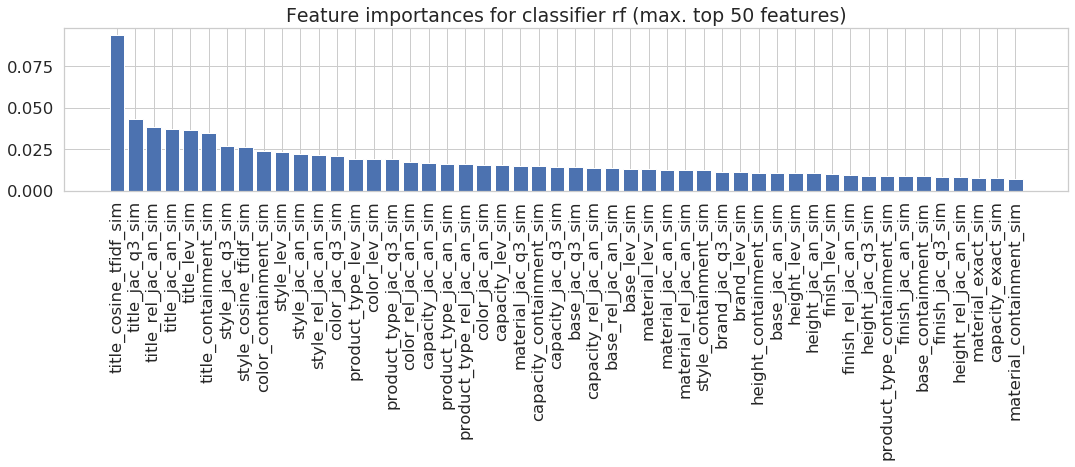

In [125]:
data_profiling.getProfilingFeatures()
ident_features_profile =  data_profiling.dict_profiling_features

In [126]:
df = pd.DataFrame.from_dict([ident_features_profile]).transpose().rename(columns={0:'Combination: {} Whole Set'.format(combo)})
if(saving):
    df.to_html(f'../results/data_profiling/kitchen/{combo}_profiling_all_feature_whole_set.html')
df.style.set_properties(**{'text-align': 'left'})

,Combination: katom_rewo Whole Set
matching_relevant_features,"['title_cosine_tfidf_sim', 'title_jac_q3_sim', 'title_rel_jac_an_sim', 'title_jac_an_sim', 'title_lev_sim', 'title_containment_sim', 'style_jac_q3_sim', 'style_cosine_tfidf_sim', 'color_containment_sim', 'style_lev_sim', 'style_jac_an_sim', 'style_rel_jac_an_sim', 'color_jac_q3_sim', 'product_type_lev_sim', 'color_lev_sim', 'product_type_jac_q3_sim', 'color_rel_jac_an_sim', 'capacity_jac_an_sim', 'product_type_jac_an_sim', 'product_type_rel_jac_an_sim', 'color_jac_an_sim', 'capacity_lev_sim', 'material_jac_q3_sim', 'capacity_containment_sim', 'capacity_jac_q3_sim', 'base_jac_q3_sim', 'capacity_rel_jac_an_sim', 'base_rel_jac_an_sim', 'base_lev_sim', 'material_lev_sim', 'material_jac_an_sim', 'material_rel_jac_an_sim', 'style_containment_sim', 'brand_jac_q3_sim', 'brand_lev_sim', 'height_containment_sim', 'base_jac_an_sim', 'height_lev_sim', 'height_jac_an_sim', 'finish_lev_sim', 'finish_rel_jac_an_sim', 'height_jac_q3_sim', 'product_type_containment_sim', 'finish_jac_an_sim', 'base_containment_sim', 'finish_jac_q3_sim', 'height_rel_jac_an_sim', 'material_exact_sim', 'capacity_exact_sim', 'material_containment_sim']"
matching_relevant_attributes_datatypes,"{'long_str', 'str'}"
matching_relevant_attributes,"{'title', 'color', 'style', 'finish', 'brand', 'product_type', 'height', 'material', 'base', 'capacity'}"
matching_relevant_attributes_count,10
matching_relevant_attributes_density,0.620000
top_matching_relevant_features_count,7
F1_xval_max,0.850000
F1_xval_top_matching_relevant_features,0.810000
top_matching_relevant_features,"['title_cosine_tfidf_sim', 'title_jac_q3_sim', 'title_rel_jac_an_sim', 'title_jac_an_sim', 'title_lev_sim', 'title_containment_sim', 'style_jac_q3_sim']"
top_relevant_attributes,"{'style', 'title'}"


In [127]:
%reset Out

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


## Calculate Passive Learning Benchmark

In [69]:
random_state = 42
estimators_super = {
    'logreg':LogisticRegression(random_state=random_state,solver='liblinear',max_iter=1000),
    'logregcv':LogisticRegressionCV(random_state=random_state,cv=5,solver='liblinear',max_iter=1000),
    'svm':LinearSVC(random_state=random_state,dual=False),
    'dectree':DecisionTreeClassifier(random_state=random_state),
    'randforest':RandomForestClassifier(random_state=random_state,n_estimators=10),
    #'svm':SVC(random_state=random_state,kernel='linear'),
    'xgb':xgb.XGBClassifier(random_state=random_state,objective="binary:logistic")}#,
    #'gpc':GaussianProcessClassifier(random_state=random_state)}

In [70]:
#candsets_super_results = dex.returnSuperBMsInDict(candsets_train,candsets_test,estimators_super,
#                                                  all_feature,progress_bar=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [30]:
df_super = alut.returnDFWithSuper(candsets_super_results,filename='../results/benchmarks/kitchen_passive_learning_baseline')

,logreg,logregcv,svm,dectree,randforest,xgb
katom_cdi,0.815,0.875,0.853,0.848,0.904,0.917
rewo_cdi,0.727,0.729,0.727,0.786,0.822,0.851
katom_rewo,0.747,0.748,0.743,0.768,0.810,0.839


In [32]:
sup.saveResultsToJSON(candsets_super_results,'../results/benchmarks/kitchen_candsets_super_results')

Saved in ../results/benchmarks/home_candsets_super_results.json


#### Calculate Unsupervised Benchmark

In [35]:
candsets_unsuper_results = dex.returnUnsuperBMsInDict(candsets_test, label='label')

In [37]:
sup.saveResultsToJSON(candsets_unsuper_results,'../results/benchmarks/kitchen_candsets_unsuper_results')

Saved in ../results/benchmarks/home_candsets_unsuper_results.json


In [38]:
df_unsuper = alut.returnDFWithUnsuper(candsets_unsuper_results,
                                      filename='../results/benchmarks/kitchen_unsupervised_baseline')

,F1 score,Elbow Threshold
katom_cdi,0.648,0.486
rewo_cdi,0.652,0.269
katom_rewo,0.196,0.664


## Calculate Domain Relatedness

In [35]:
domain_relatedness = dex.calcDomainRelatednessCVinDict(candsets, all_feature, dense_features_dict, cv=5, metric='phi')

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [36]:
pd.DataFrame.from_dict(domain_relatedness, orient='index').apply(lambda x: round(x,3))

all  dense
katom_cdi rewo_cdi    0.823  0.822
          katom_rewo  0.829  0.835
rewo_cdi  katom_rewo  0.886  0.887

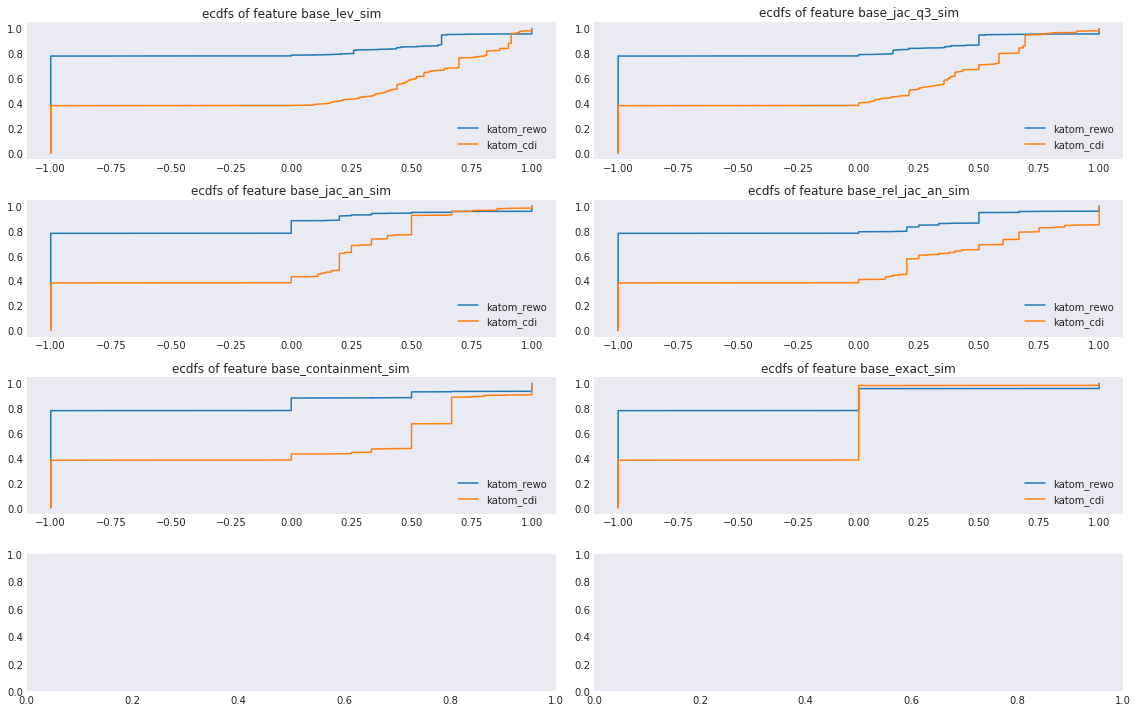

In [105]:
dex.plotECDFsForFeatures('katom_rewo','katom_cdi',['base_lev_sim','base_jac_q3_sim','base_jac_an_sim',
                                    'base_rel_jac_an_sim','base_containment_sim','base_exact_sim'],candsets)